<a href="https://drive.google.com/file/d/1XqWysWD6N_liJLEiLXtxWLbGsPaOeWlV/view?usp=sharing" target="_blank" >
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>

## Basics of Convolution and Filtering

In [54]:
# Importing required libraries
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Input
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
# Importing required libraries
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Conv2D, Input
import matplotlib.pyplot as plt
%matplotlib inline

#### Convolution

We define below a function that builds a barebones CNN with only one convolution layer, consisting of only one filter.
You can call this function inorder to reset the network for subsequent kernels

In [56]:
# Helper function that returns a model with a single conv2d layer
def build_basic(kernel_size = 3,input_shape = (700,500,1)):
    model = Sequential(name = 'Convolution')
    model.add(Input(shape=input_shape))
    model.add(Conv2D(1,kernel_size=kernel_size,padding='same',use_bias=False))
    
    return model

In [57]:
# We intialize the model for demonstration
model = build_basic()
model.summary()

Model: "Convolution"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 700, 500, 1)       9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


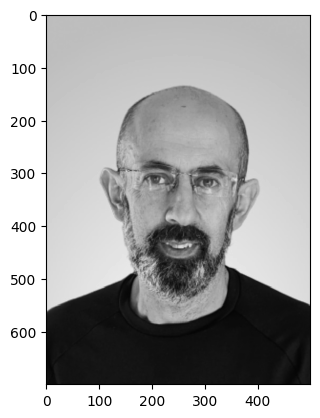

In [58]:
# Here we load the image of your favorite professor as a 2D matrix
img_pavlos = load_img('pavlos.jpeg',color_mode='grayscale',target_size = (700,500))

#Normalizing the image
img_pavlos=np.array(img_pavlos)/255.

#Displaying the images
fig,ax = plt.subplots(1,1)
ax.imshow(img_pavlos,cmap="gray")

### Model prediction with random weights

Models are initialized with random weights, and thus the output will not be of significance.
However, we show below how you can take the 2D image and pass it through your model to get an output

1/1 [==============================] - 0s 123ms/step


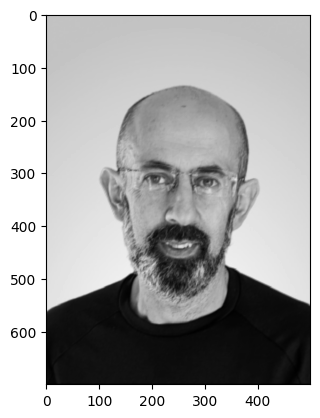

In [59]:
#Converting 2D image tensor to 4D because keras models require 4D tensors as inputs
img_preprocess = np.expand_dims(img_pavlos, axis=[0,3])

# Passing the image through our model
img_out = model.predict(img_preprocess)

# Converting our 4D image back to 2D for visualization with matplotlib
conv_pavlos = img_out.squeeze()
plt.imshow(conv_pavlos,cmap='gray')

1/1 [==============================] - 0s 89ms/step


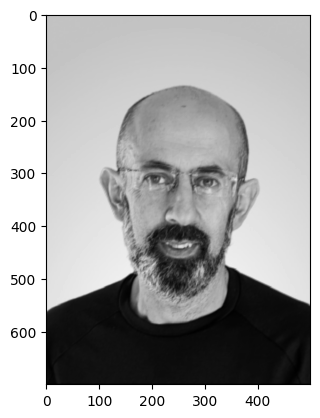

In [60]:
#The above can be done in one step by combining the process
conv_pavlos = model.predict(np.expand_dims(img_pavlos, axis=[0,3])).squeeze()
plt.imshow(conv_pavlos,cmap='gray')

### Blurring Kernel
As we saw above, the initialized weights are random, but to perform specific tasks, 
we know a few kernel matrices.
Usually, these kernels are *learned* during model training, however for demonstration
We will be *setting* the weights for the conv2D layer using Keras `set_weights()` function

1/1 [==============================] - 0s 85ms/step


C:\Users\14065\AppData\Local\Temp\ipykernel_19904\1258012766.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


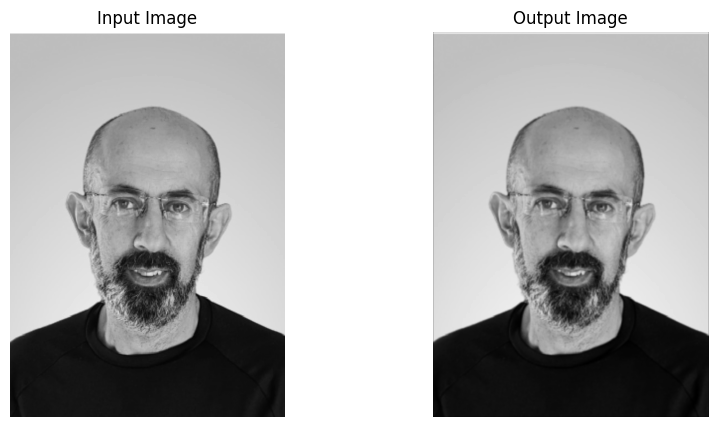

In [61]:
#Defining a kernel for blurring
blur_kernel = np.array([[0.0625, 0.125, 0.0625],
                        [0.125,0.25, 0.125],
                        [0.0625, 0.125, 0.0625]])

# We access the conv2D layer by model.layers[0]
# set_weights() needs a list of weights which are also 4D tensors
# Hence we convert the above 2D blur_kernel to 4D using np.expand_dims

model.layers[0].set_weights([np.expand_dims(blur_kernel,axis=[2,3])])

# Now make a prediction using your model and visualize your results 
# conv_pavlos_1 = model.predict(np.expand_dims(img_pavlos, axis=[0,3])).squeeze()
# plt.imshow(conv_pavlos_1,cmap='gray')

output_img = model.predict(np.expand_dims(img_pavlos, axis=[0,3])).squeeze()
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_pavlos, cmap='gray')
axs[0].axis("off")
axs[0].set_title("Input Image")
axs[1].imshow(output_img, cmap='gray')
axs[1].axis("off")
axs[1].set_title("Output Image")
fig.show()


Q1. What happens to the blurring output if we increase the kernel size?

The larger the kernel size, the more the blurring. This is because we are averaging out a larger group of pixels of the image.

In [62]:
# Try changing the kernel size to see its effect on blurring
blur_kernel = np.ones((10,10))

model_10 = build_basic(kernel_size=10)

model_10.summary()

Model: "Convolution"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 700, 500, 1)       100       
                                                                 
Total params: 100
Trainable params: 100
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 210ms/step


C:\Users\14065\AppData\Local\Temp\ipykernel_19904\803867916.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


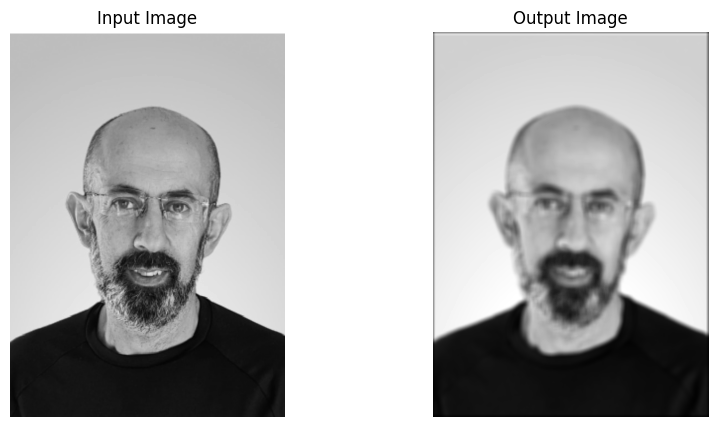

In [63]:
model_10.layers[0].set_weights([np.expand_dims(blur_kernel,axis=[2,3])])

# Now make a prediction using your model and visualize your results 
# conv_pavlos_1 = model.predict(np.expand_dims(img_pavlos, axis=[0,3])).squeeze()
# plt.imshow(conv_pavlos_1,cmap='gray')

output_img = model_10.predict(np.expand_dims(img_pavlos, axis=[0,3])).squeeze()
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_pavlos, cmap='gray')
axs[0].axis("off")
axs[0].set_title("Input Image")
axs[1].imshow(output_img, cmap='gray')
axs[1].axis("off")
axs[1].set_title("Output Image")
fig.show()

### Sharpening Kernel
Use the pre-defined sharpening kernel to compare output with original image

In [64]:
#Defining a kernel for sharpening,

sharp_kernel = np.array([[0, -1, 0],
                         [-1,5, -1],
                         [0,-1, 0]])


1/1 [==============================] - 0s 120ms/step


C:\Users\14065\AppData\Local\Temp\ipykernel_19904\4255240424.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


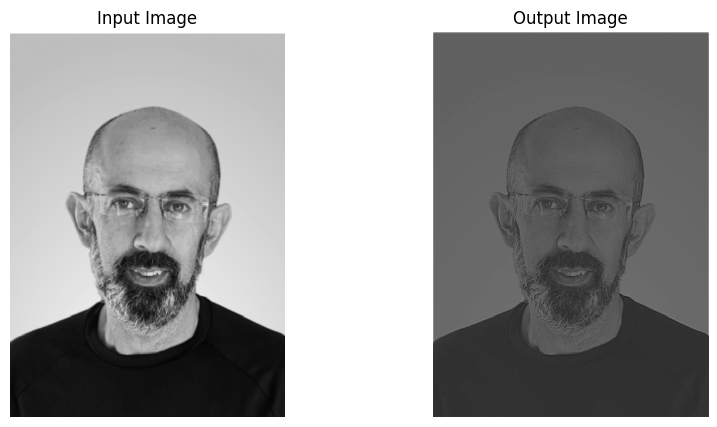

In [65]:
model.layers[0].set_weights([np.expand_dims(sharp_kernel,axis=[2,3])])

# Now make a prediction using your model and visualize your results 

output_img = model.predict(np.expand_dims(img_pavlos, axis=[0,3])).squeeze()
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_pavlos, cmap='gray')
axs[0].axis("off")
axs[0].set_title("Input Image")
axs[1].imshow(output_img, cmap='gray')
axs[1].axis("off")
axs[1].set_title("Output Image")
fig.show()

In [84]:
#Try changing the kernel values to see its effect on sharpening

sharp_kernel = np.array([[0, -2, 0],
                         [-2,20,-2],
                         [0, -2, 0]])


1/1 [==============================] - 0s 235ms/step


C:\Users\14065\AppData\Local\Temp\ipykernel_19904\4255240424.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


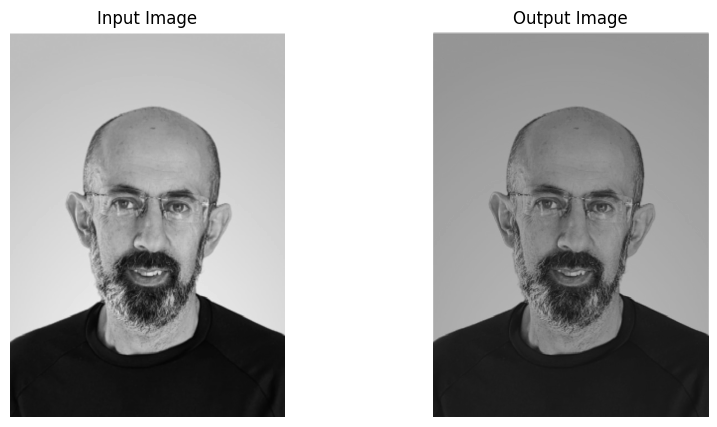

In [85]:
model.layers[0].set_weights([np.expand_dims(sharp_kernel,axis=[2,3])])

# Now make a prediction using your model and visualize your results 

output_img = model.predict(np.expand_dims(img_pavlos, axis=[0,3])).squeeze()
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_pavlos, cmap='gray')
axs[0].axis("off")
axs[0].set_title("Input Image")
axs[1].imshow(output_img, cmap='gray')
axs[1].axis("off")
axs[1].set_title("Output Image")
fig.show()

Q2. How does the range of the pixels in the sharpened output vary with changing kernel values?

The more we sharpen the image, the higher the range of the pixels. This is because we want to emphasize the difference between adjacent pixels to sharpen the image

Q3. How do the kernel values given above sharpen an image?

The sharpen kernel emphasizes differences in adjacent pixel values. This makes the image look more vivid. 

### Vertical Detection

In [86]:
#Define a kernel to to find the vertical lines in an image
ver_kernel=np.array([[-1,0,1], 
                     [-2,0,2], 
                     [-1,0,1]])


1/1 [==============================] - 0s 76ms/step


C:\Users\14065\AppData\Local\Temp\ipykernel_19904\1332030085.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


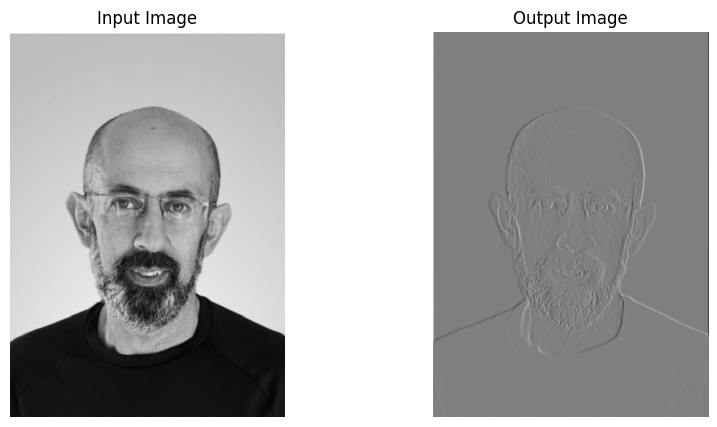

In [87]:
model.layers[0].set_weights([np.expand_dims(ver_kernel,axis=[2,3])])

# Now make a prediction using your model and visualize your results 

output_img = model.predict(np.expand_dims(img_pavlos, axis=[0,3])).squeeze()
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_pavlos, cmap='gray')
axs[0].axis("off")
axs[0].set_title("Input Image")
axs[1].imshow(output_img, cmap='gray')
axs[1].axis("off")
axs[1].set_title("Output Image")
fig.show()

In [88]:
#Try changing the kernel values to see its effect on vertical edge detection

#Define a kernel to to find the vertical lines in an image
ver_kernel=np.array([[-3,0,3], 
                     [-6,0,6], 
                     [-3,0,3]])


1/1 [==============================] - 0s 127ms/step


C:\Users\14065\AppData\Local\Temp\ipykernel_19904\1332030085.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


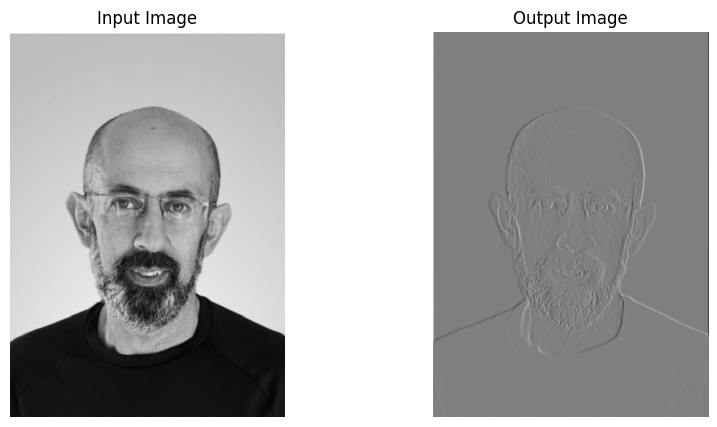

In [89]:
model.layers[0].set_weights([np.expand_dims(ver_kernel,axis=[2,3])])

# Now make a prediction using your model and visualize your results 

output_img = model.predict(np.expand_dims(img_pavlos, axis=[0,3])).squeeze()
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_pavlos, cmap='gray')
axs[0].axis("off")
axs[0].set_title("Input Image")
axs[1].imshow(output_img, cmap='gray')
axs[1].axis("off")
axs[1].set_title("Output Image")
fig.show()

Q4. How would you change the kernel in order to enhance the vertical edges even more?

Increase the difference between the top and bottom row of the kernel to enhance the change in the vertical direction.

### Horizontal Detection

In [90]:
#Define a kernel to to find the horizontal lines in an image
hor_kernel = np.array([[-1,-2,-1], 
                   [0,0,0], 
                   [1,2,1]])


1/1 [==============================] - 0s 102ms/step


C:\Users\14065\AppData\Local\Temp\ipykernel_19904\1416927588.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


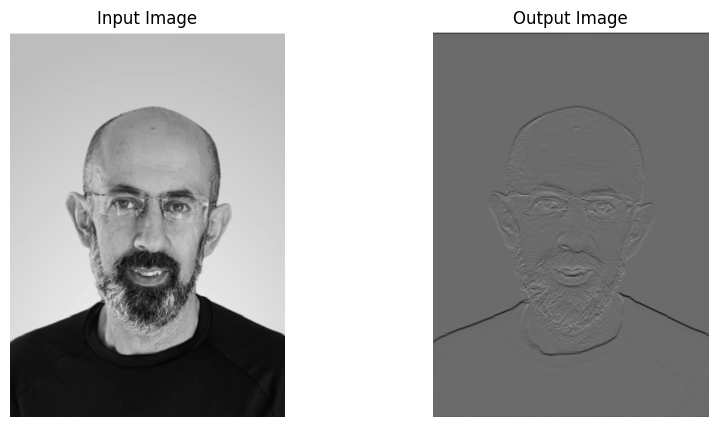

In [91]:
model.layers[0].set_weights([np.expand_dims(hor_kernel,axis=[2,3])])

# Now make a prediction using your model and visualize your results 

output_img = model.predict(np.expand_dims(img_pavlos, axis=[0,3])).squeeze()
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_pavlos, cmap='gray')
axs[0].axis("off")
axs[0].set_title("Input Image")
axs[1].imshow(output_img, cmap='gray')
axs[1].axis("off")
axs[1].set_title("Output Image")
fig.show()

Q5. How would you change the kernel in order to enhance the horizontal edges even more?

Increase the difference between the right and left columns of the kernel to enhance the change in the horizontal direction.

In [92]:
#Try changing the kernel values to see its effect on horizontal edge detection

#Define a kernel to to find the horizontal lines in an image
hor_kernel = np.array([[-3,-6,-3], 
                   [0,0,0], 
                   [3,6,3]])



1/1 [==============================] - 0s 111ms/step


C:\Users\14065\AppData\Local\Temp\ipykernel_19904\1416927588.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


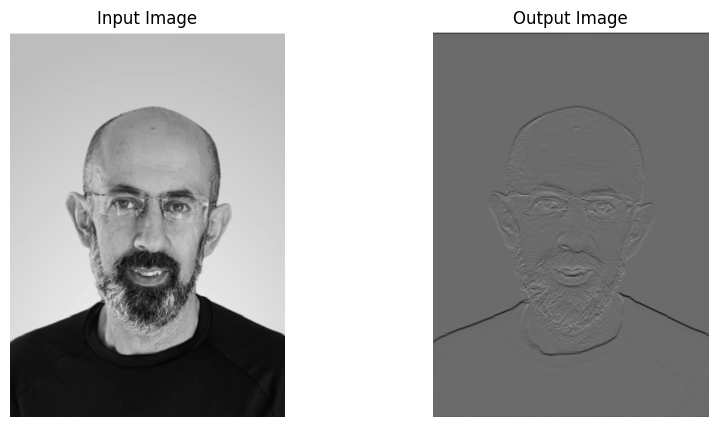

In [93]:
model.layers[0].set_weights([np.expand_dims(hor_kernel,axis=[2,3])])

# Now make a prediction using your model and visualize your results 

output_img = model.predict(np.expand_dims(img_pavlos, axis=[0,3])).squeeze()
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_pavlos, cmap='gray')
axs[0].axis("off")
axs[0].set_title("Input Image")
axs[1].imshow(output_img, cmap='gray')
axs[1].axis("off")
axs[1].set_title("Output Image")
fig.show()

#### Edge Detection

Combining both horizontal and vertical edge detection to find all edges in the image. <br>
<br>
We do this by simply adding the outputs of the horizontal and vertical edge detection:

$E = Horizontal +Vertical$

1/1 [==============================] - 0s 126ms/step


C:\Users\14065\AppData\Local\Temp\ipykernel_19904\3692236881.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


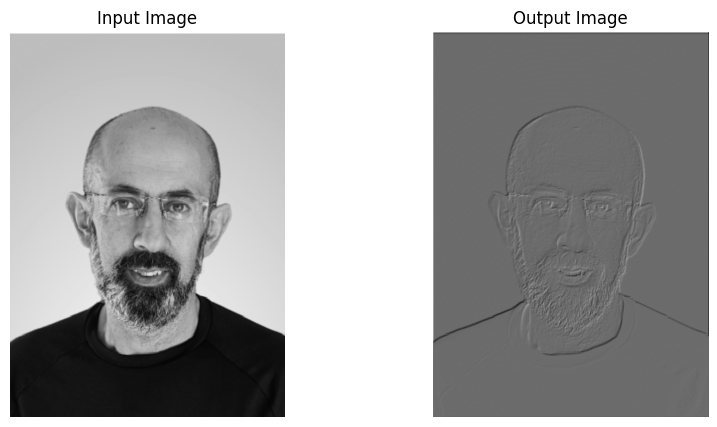

In [97]:
# Now we will combine the horizontal and vertical edges
# Hint: Look at the formula above
hor_kernel = np.array(
    [[-3,-6,-3], 
     [0,0,0], 
     [3,6,3]])
ver_kernel=np.array([[-3,0,3], 
                     [-6,0,6], 
                     [-3,0,3]])

edge_kernel = (hor_kernel+ver_kernel)*7

model.layers[0].set_weights([np.expand_dims(edge_kernel,axis=[2,3])])

# Now make a prediction using your model and visualize your results 

output_img = model.predict(np.expand_dims(img_pavlos, axis=[0,3])).squeeze()
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_pavlos, cmap='gray')
axs[0].axis("off")
axs[0].set_title("Input Image")
axs[1].imshow(output_img, cmap='gray')
axs[1].axis("off")
axs[1].set_title("Output Image")
fig.show()

1/1 [==============================] - 0s 42ms/step


C:\Users\14065\AppData\Local\Temp\ipykernel_19904\2822785360.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


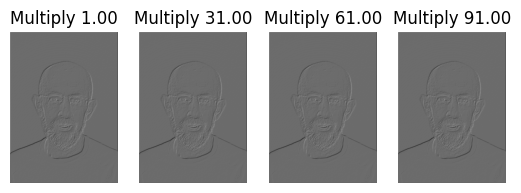

In [116]:
#Try multiplying different constants to the edge detection formula to see how they vary

# Now make a prediction using your model and visualize your results 
x_l = np.linspace(1,121,5)
fig, axs = plt.subplots(1, 4)

img_out_list = []
kenrnel_list = []
for i,x in zip(range(0,4),x_l):
    ax = axs[i]

    edge_kernel = (hor_kernel+ver_kernel)*x
    model.layers[0].set_weights([np.expand_dims(edge_kernel,axis=[2,3])])
    output_img = model.predict(np.expand_dims(img_pavlos, axis=[0,3])).squeeze()
    img_out_list.append(output_img)
    kenrnel_list.append(edge_kernel)

    ax.imshow(output_img, cmap='gray')
    ax.axis("off")
    ax.set_title(f"Multiply {x:.2f}")
    
fig.show()